In [1]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

print(x_train_full.shape, x_train_full.dtype)
print(x_test.shape, x_test.dtype)

VAL_SIZE = 4000

x_valid, x_train = x_train_full[:VAL_SIZE] / 255.0, x_train_full[VAL_SIZE:] / 255.0
y_valid, y_train = y_train_full[:VAL_SIZE], y_train_full[VAL_SIZE:]

# Перетворення 2D зображень у 1D вектори
x_train = x_train.reshape(-1, 28 * 28)
x_valid = x_valid.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Перетворення міток класів у one-hot encoding
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_valid_one_hot = keras.utils.to_categorical(y_valid, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

2024-09-24 11:38:53.358164: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 11:38:53.358739: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 11:38:53.362519: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-24 11:38:53.373143: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 11:38:53.388417: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

(60000, 28, 28) uint8
(10000, 28, 28) uint8


In [2]:
class_names = [
    'T-shirt',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

class_names[y_train[0]], class_names[y_valid[0]]

('Bag', 'Ankle boot')

In [3]:
import tensorflow as tf

def create_model_relu():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
def create_model_tanh():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(512, activation='tanh', input_shape=(28*28,)),
        tf.keras.layers.Dense(256, activation='tanh'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [5]:
def create_model_relu_new():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(256, activation='relu', input_shape=(28*28,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

def train_and_plot(model, model_name, x_train, y_train, x_valid, y_valid):
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid), batch_size=32, verbose=2)
    
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

    val_loss, val_acc = model.evaluate(x_valid, y_valid, verbose=0)
    print(f"Точність на валідаційних даних для {model_name}: {val_acc:.4f}")

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 13s - 8ms/step - accuracy: 0.8259 - loss: 0.4771 - val_accuracy: 0.8593 - val_loss: 0.3849
Epoch 2/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8673 - loss: 0.3582 - val_accuracy: 0.8708 - val_loss: 0.3485
Epoch 3/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8809 - loss: 0.3206 - val_accuracy: 0.8748 - val_loss: 0.3378
Epoch 4/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8890 - loss: 0.2967 - val_accuracy: 0.8767 - val_loss: 0.3463
Epoch 5/10
1750/1750 - 12s - 7ms/step - accuracy: 0.8959 - loss: 0.2759 - val_accuracy: 0.8857 - val_loss: 0.3057
Epoch 6/10
1750/1750 - 11s - 7ms/step - accuracy: 0.8997 - loss: 0.2636 - val_accuracy: 0.8823 - val_loss: 0.3335
Epoch 7/10
1750/1750 - 12s - 7ms/step - accuracy: 0.9053 - loss: 0.2502 - val_accuracy: 0.8823 - val_loss: 0.3182
Epoch 8/10
1750/1750 - 12s - 7ms/step - accuracy: 0.9096 - loss: 0.2382 - val_accuracy: 0.8905 - val_loss: 0.3138
Epoch 9/10
1750/1750 - 11s - 6ms/step - accuracy: 0.9129 - loss: 0.2303 - val_accuracy: 

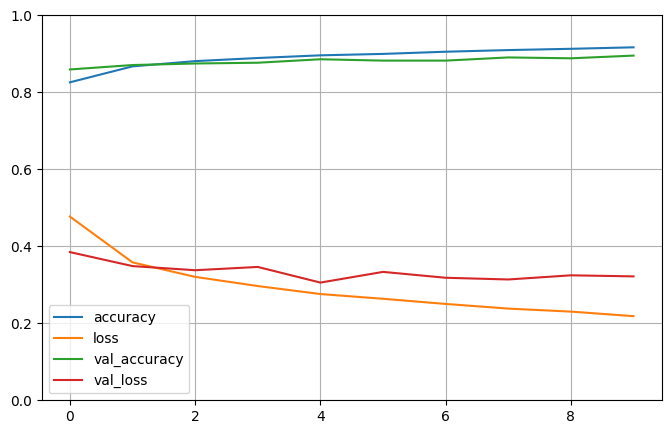

Точність на валідаційних даних для Модель 1: 0.8953


In [7]:
model_1 = create_model_relu()
train_and_plot(model_1, "Модель 1", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 13s - 8ms/step - accuracy: 0.8239 - loss: 0.4792 - val_accuracy: 0.8493 - val_loss: 0.4041
Epoch 2/10
1750/1750 - 13s - 8ms/step - accuracy: 0.8601 - loss: 0.3751 - val_accuracy: 0.8760 - val_loss: 0.3416
Epoch 3/10
1750/1750 - 12s - 7ms/step - accuracy: 0.8719 - loss: 0.3472 - val_accuracy: 0.8717 - val_loss: 0.3550
Epoch 4/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8778 - loss: 0.3275 - val_accuracy: 0.8742 - val_loss: 0.3522
Epoch 5/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8836 - loss: 0.3121 - val_accuracy: 0.8748 - val_loss: 0.3466
Epoch 6/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8865 - loss: 0.3058 - val_accuracy: 0.8635 - val_loss: 0.3663
Epoch 7/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8880 - loss: 0.2987 - val_accuracy: 0.8733 - val_loss: 0.3370
Epoch 8/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8932 - loss: 0.2864 - val_accuracy: 0.8748 - val_loss: 0.3432
Epoch 9/10
1750/1750 - 11s - 6ms/step - accuracy: 0.8938 - loss: 0.2845 - val_accuracy: 

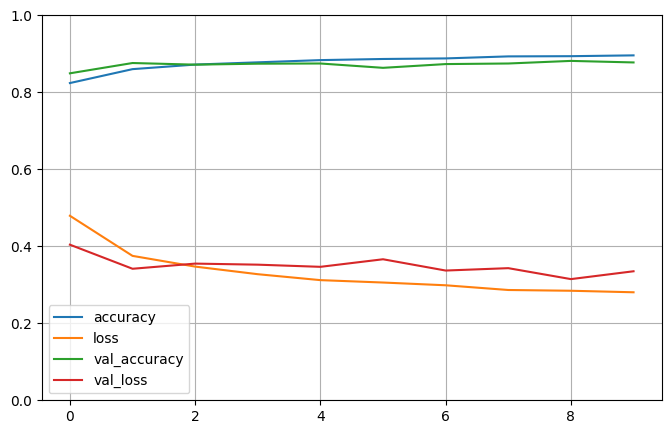

Точність на валідаційних даних для Модель 2: 0.8775


In [8]:
model_2 = create_model_tanh()
train_and_plot(model_2, "Модель 2", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

/home/suphomie/uni/homeworks-labs/deep-learning-tools/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1750/1750 - 10s - 6ms/step - accuracy: 0.8250 - loss: 0.4863 - val_accuracy: 0.8597 - val_loss: 0.3974
Epoch 2/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8641 - loss: 0.3704 - val_accuracy: 0.8668 - val_loss: 0.3621
Epoch 3/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8763 - loss: 0.3313 - val_accuracy: 0.8720 - val_loss: 0.3622
Epoch 4/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8854 - loss: 0.3073 - val_accuracy: 0.8745 - val_loss: 0.3505
Epoch 5/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8919 - loss: 0.2889 - val_accuracy: 0.8890 - val_loss: 0.3140
Epoch 6/10
1750/1750 - 8s - 4ms/step - accuracy: 0.8953 - loss: 0.2755 - val_accuracy: 0.8785 - val_loss: 0.3463
Epoch 7/10
1750/1750 - 8s - 4ms/step - accuracy: 0.9007 - loss: 0.2622 - val_accuracy: 0.8810 - val_loss: 0.3225
Epoch 8/10
1750/1750 - 8s - 4ms/step - accuracy: 0.9067 - loss: 0.2487 - val_accuracy: 0.8740 - val_loss: 0.3583
Epoch 9/10
1750/1750 - 8s - 4ms/step - accuracy: 0.9081 - loss: 0.2433 - val_accuracy: 0.8880 -

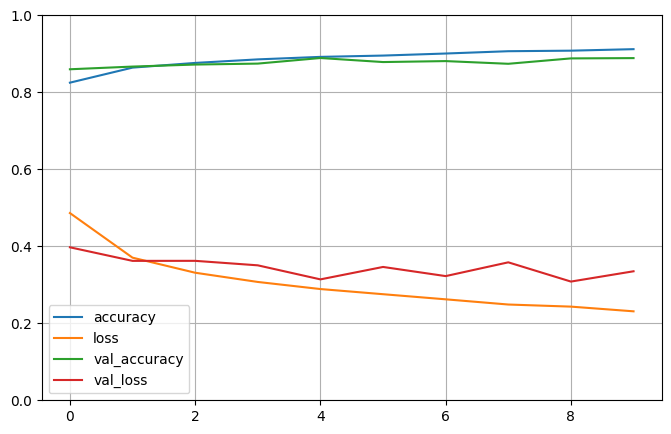

Точність на валідаційних даних для Модель 3: 0.8888


In [9]:
model_3 = create_model_relu_new()
train_and_plot(model_3, "Модель 3", x_train, y_train_one_hot, x_valid, y_valid_one_hot)

In [10]:
from sklearn.metrics import classification_report
import numpy as np

def classification_report_for_model(model, model_name):
    y_pred = model.predict(x_test)
    
    print(f"Звіт по класифікації для {model_name}:")
    print(classification_report(y_test, y_pred.argmax(axis=1), target_names=class_names))

In [11]:
classification_report_for_model(model_1, "Модель 1")
classification_report_for_model(model_2, "Модель 2")
classification_report_for_model(model_3, "Модель 3")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Звіт по класифікації для Модель 1:
              precision    recall  f1-score   support

     T-shirt       0.82      0.87      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.85      0.69      0.76      1000
       Dress       0.90      0.87      0.88      1000
        Coat       0.63      0.94      0.76      1000
      Sandal       0.99      0.88      0.93      1000
       Shirt       0.81      0.56      0.67      1000
     Sneaker       0.96      0.83      0.89      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.80      0.99      0.89      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Звіт по класифікації для Модель 2:
              precision    recall  f1-score   support

     T-shirt       0.79      0.87 